In [1]:
import os
import pandas as pd

base_dir = os.path.expanduser(r'~/Downloads/London Houses')

file_path = os.path.join(base_dir, 'london_houses.csv')

if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"File not found at: {file_path}")

london_houses = pd.read_csv(file_path)

print(london_houses.info())

File found at: C:\Users\kamle/Downloads/London Houses\london_houses.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (

In [7]:
print(london_houses.isnull().sum())

print(london_houses.describe())

print(f"Number of duplicate rows: {london_houses.duplicated().sum()}")

Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64
          Bedrooms    Bathrooms  Square Meters  Building Age       Floors  \
count  1000.000000  1000.000000      1000.0000    1000.00000  1000.000000   
mean      3.013000     2.003000       149.6270      49.96500     1.991000   
std       1.393834     0.808483        58.0562      29.07086     0.821946   
min       1.000000     1.000000        50.0000       1.00000     1.000000   
25%       2.000000     1.000000        99.0000      24.00000     1.000000   
50%       3.000000     2.000000       148.0000      50.00000     2.000000   
75%       4.000000     3.000000       201.0000      76.00000     3.000000   
max       5.00

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

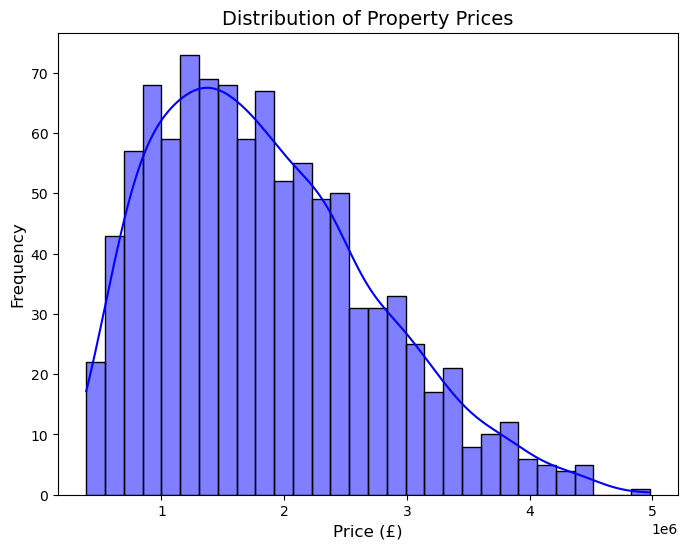

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(london_houses['Price (£)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Property Prices', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

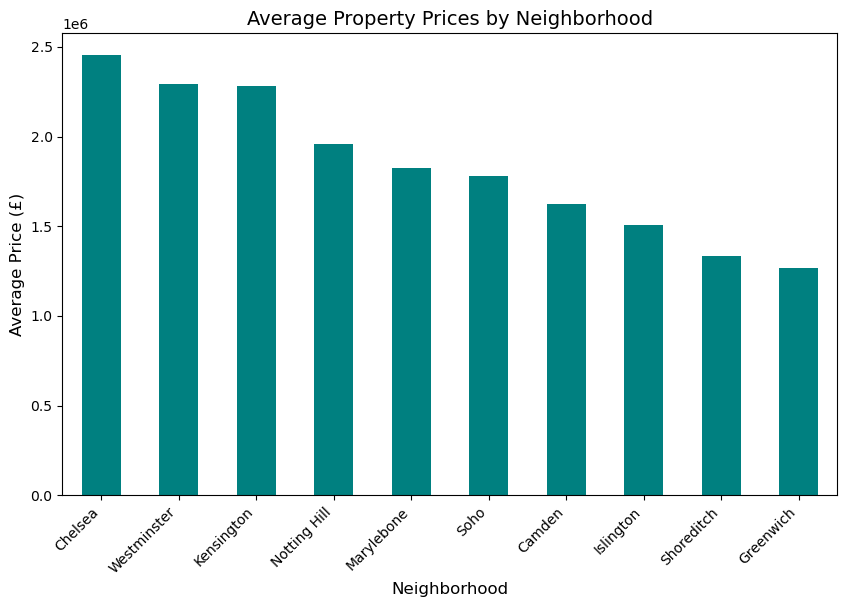

In [15]:
neighborhood_prices = london_houses.groupby('Neighborhood')['Price (£)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Property Prices by Neighborhood', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

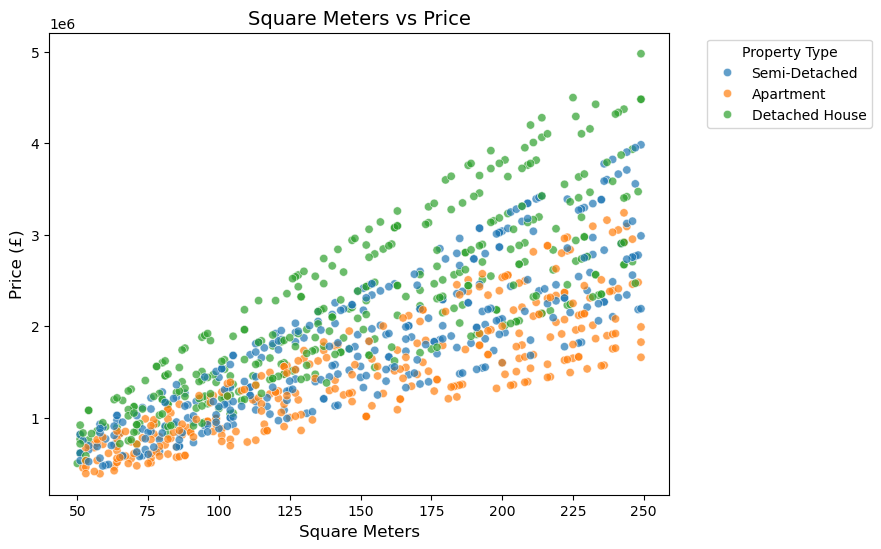

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=london_houses, x='Square Meters', y='Price (£)', hue='Property Type', alpha=0.7)
plt.title('Square Meters vs Price', fontsize=14)
plt.xlabel('Square Meters', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
numeric_data = london_houses.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

In [8]:
print(correlation_matrix)

               Bedrooms  Bathrooms  Square Meters  Building Age    Floors  \
Bedrooms       1.000000  -0.030236      -0.020413     -0.033883 -0.026984   
Bathrooms     -0.030236   1.000000      -0.032733     -0.026529  0.037699   
Square Meters -0.020413  -0.032733       1.000000      0.008557  0.023822   
Building Age  -0.033883  -0.026529       0.008557      1.000000 -0.042743   
Floors        -0.026984   0.037699       0.023822     -0.042743  1.000000   
Price (£)     -0.016679  -0.032632       0.790652      0.031522  0.015625   

               Price (£)  
Bedrooms       -0.016679  
Bathrooms      -0.032632  
Square Meters   0.790652  
Building Age    0.031522  
Floors          0.015625  
Price (£)       1.000000  


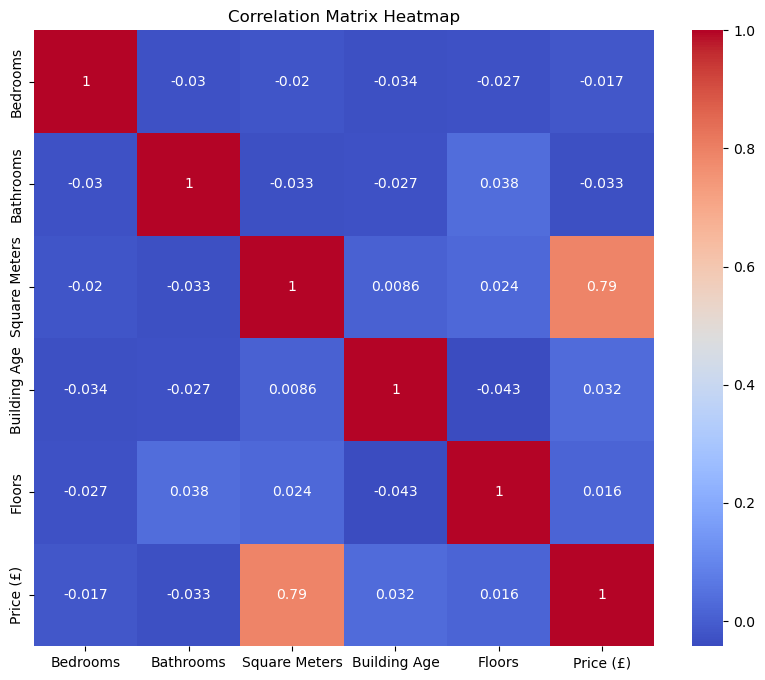

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

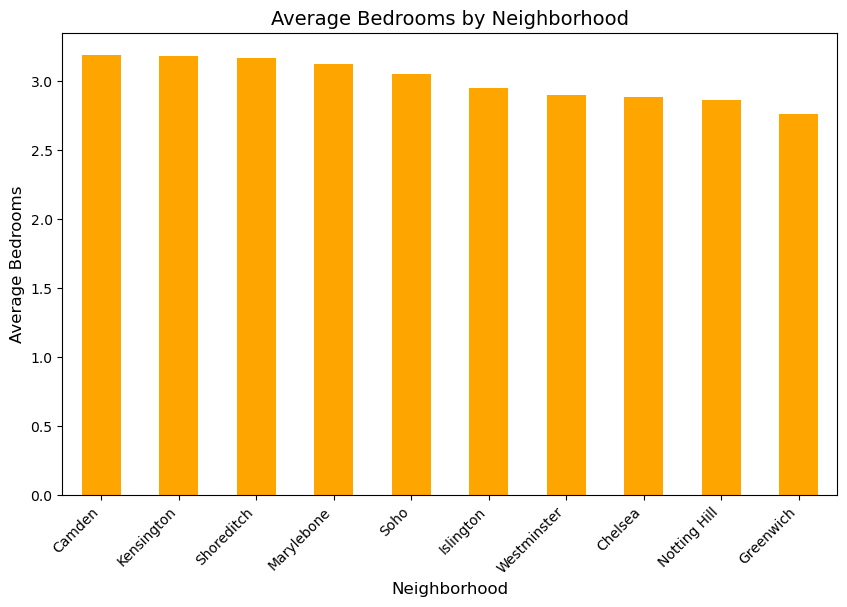

In [25]:
bedrooms_by_neighborhood = london_houses.groupby('Neighborhood')['Bedrooms'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bedrooms_by_neighborhood.plot(kind='bar', color='orange')
plt.title('Average Bedrooms by Neighborhood', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Bedrooms', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

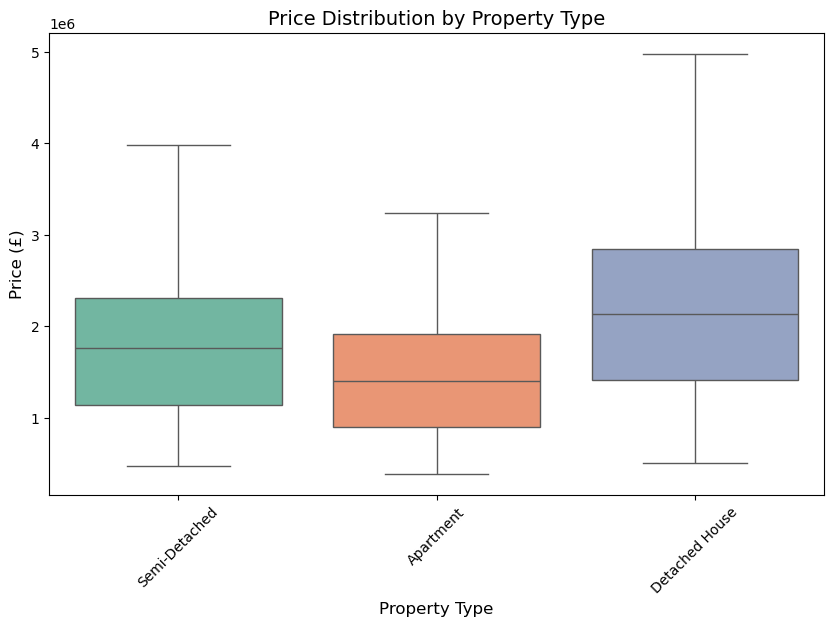

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=london_houses, x='Property Type', y='Price (£)', hue='Property Type', palette='Set2', legend=False)
plt.title('Price Distribution by Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

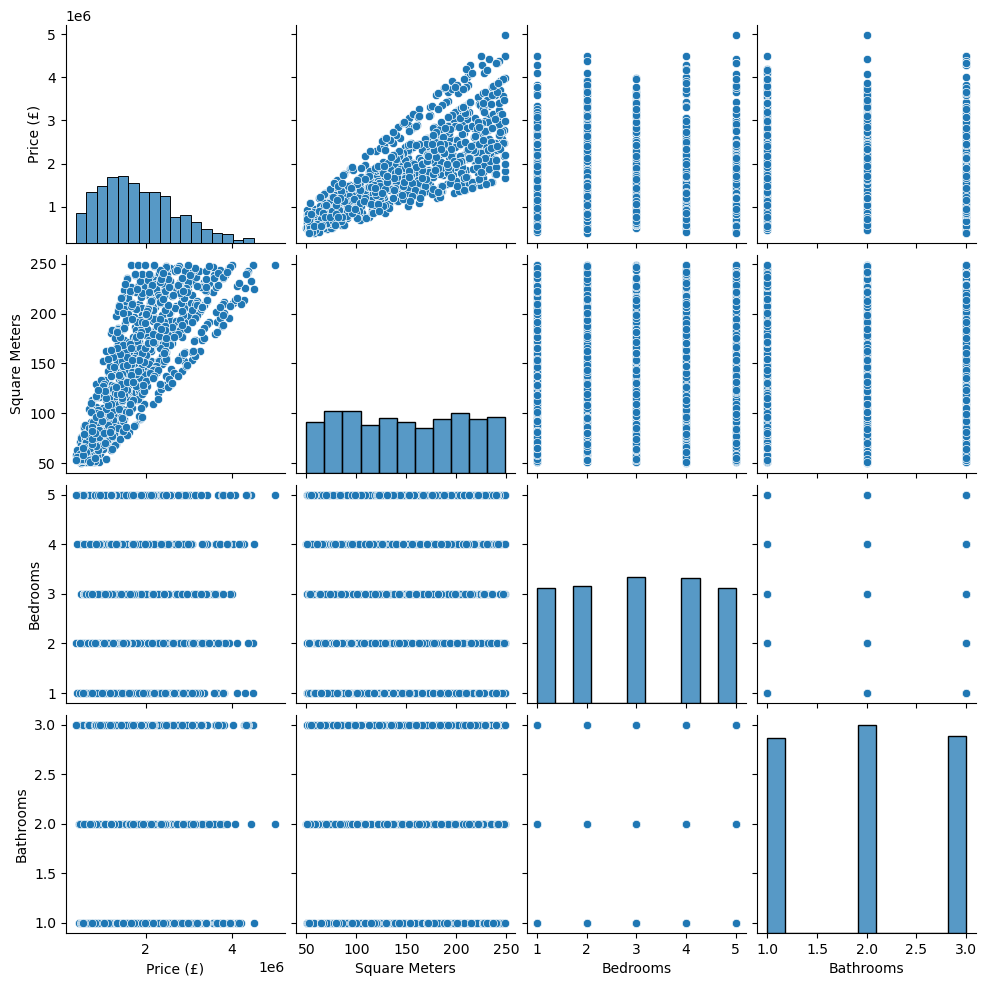

In [31]:
import seaborn as sns
sns.pairplot(london_houses, vars=['Price (£)', 'Square Meters', 'Bedrooms', 'Bathrooms'])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
X = london_houses[['Square Meters']]
y = london_houses['Price (£)']
model = LinearRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

Intercept: 48933.05181095586, Coefficient: 11975.60751862327


In [14]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


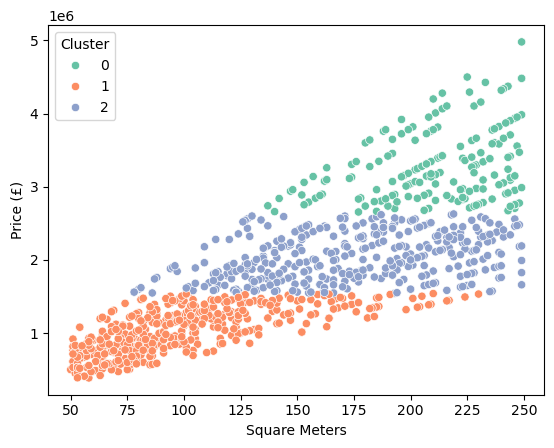

In [39]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

X = london_houses[['Square Meters', 'Price (£)']]

kmeans = KMeans(n_clusters=3)
london_houses['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=london_houses, x='Square Meters', y='Price (£)', hue='Cluster', palette='Set2')
plt.show()

In [16]:
q1 = london_houses['Price (£)'].quantile(0.25)
q3 = london_houses['Price (£)'].quantile(0.75)
iqr = q3 - q1
outliers = london_houses[(london_houses['Price (£)'] < (q1 - 1.5 * iqr)) | (london_houses['Price (£)'] > (q3 + 1.5 * iqr))]
print(outliers)

               Address Neighborhood  Bedrooms  Bathrooms  Square Meters  \
86    77 Oxford Street      Chelsea         5          2            249   
333   100 Baker Street      Chelsea         4          3            214   
406  160 Oxford Street      Chelsea         4          1            225   
497         143 Strand  Westminster         2          3            249   
528   139 Fleet Street   Kensington         1          3            226   
568     29 King's Road  Westminster         1          3            249   
602  150 Oxford Street   Kensington         5          2            233   
715     37 King's Road  Westminster         2          3            243   
947    52 Fleet Street  Westminster         5          3            241   
980       22 Park Lane  Westminster         5          3            240   

     Building Age Garden Garage  Floors   Property Type        Heating Type  \
86              3    Yes     No       2  Detached House     Central Heating   
333            2

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = london_houses[['Square Meters', 'Bedrooms', 'Bathrooms']]
y = london_houses['Price (£)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f"Model R^2 score: {model.score(X_test, y_test)}")

Model R^2 score: 0.48854436903905607


In [18]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'Downloads', 'London Houses', 'london_houses.csv')

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found at {file_path}. Ensure 'london_houses.csv' is in the correct folder.")

london_houses = pd.read_csv(file_path)

numerical_data = london_houses.select_dtypes(include=['number'])

X = london_houses[['Square Meters']]
y = london_houses['Price (£)']
model = LinearRegression()
model.fit(X, y)
regression_line = model.predict(X)

clustering_features = london_houses[['Square Meters', 'Price (£)']]
kmeans = KMeans(n_clusters=3, random_state=42)
london_houses['Cluster'] = kmeans.fit_predict(clustering_features)

predictor_features = ['Square Meters', 'Bedrooms', 'Bathrooms']
X_rf = london_houses[predictor_features]
y_rf = london_houses['Price (£)']
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

app = dash.Dash(__name__)

price_fig = px.histogram(
    london_houses,
    x='Price (£)',
    nbins=30,
    title='Distribution of Property Prices',
    labels={'Price (£)': 'Price (£)'}
)
price_fig.update_layout(bargap=0.1)

neighborhood_prices = london_houses.groupby('Neighborhood')['Price (£)'].mean().sort_values(ascending=False).reset_index()
neighborhood_fig = px.bar(
    neighborhood_prices,
    x='Neighborhood',
    y='Price (£)',
    title='Average Property Prices by Neighborhood',
    labels={'Price (£)': 'Average Price (£)'}
)
neighborhood_fig.update_xaxes(tickangle=45)

scatter_fig = px.scatter(
    london_houses,
    x='Square Meters',
    y='Price (£)',
    color='Cluster',
    title='Square Meters vs Price (with Clusters)',
    labels={'Square Meters': 'Square Meters', 'Price (£)': 'Price (£)'}
)
scatter_fig.add_trace(
    go.Scatter(x=london_houses['Square Meters'], y=regression_line, mode='lines', name='Regression Line')
)

correlation_matrix = numerical_data.corr()
heatmap_fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis'
))
heatmap_fig.update_layout(
    title='Correlation Matrix of Numerical Features',
    xaxis_nticks=36
)

rf_score_display = html.Div([
    html.H4("Random Forest Model R^2 Score"),
    html.P(f"R^2 Score on Test Data: {rf_score:.2f}")
])

app.layout = html.Div([
    html.H1("London Houses Dashboard", style={'textAlign': 'center'}),

    html.Div([
        dcc.Graph(figure=price_fig),
        html.Br(),
        dcc.Graph(figure=neighborhood_fig),
        html.Br(),
        dcc.Graph(figure=scatter_fig),
        html.Br(),
        dcc.Graph(figure=heatmap_fig),
        html.Br(),
        rf_score_display
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)